In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV,LeaveOneOut

import ksource_py as ks

In [2]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=3)

In [4]:
# Abrir lista de particulas

folder = "Ftes_tracks" # "1_guia_n_mlcv"
tracks = folder+"/GF12p_n"
trasl = [118.5497276, -102.897199, 5.0] # None # 
rot = [0.0, 0.0, -158*np.pi/180.0] # None # 
x2z = True

set_params = False
plist = ks.PList(ks.PTRAC_read, tracks, trasl=trasl, rot=rot, switch_x2z=x2z, set_params=set_params)

In [5]:
# Crear KSource

J = 3.669E+15
metric = ks.SepVarMetric(ks.Lethargy(10), ks.SurfXY(0), ks.Polar())
#metric = ks.SepVarMetric(ks.Lethargy(10), ks.Guide(7, 20), ks.Isotrop())
s = ks.KSource(plist, metric, bw="silv", J=J)

In [6]:
# Ajustar KSource

N = 1e5 # Cantidad de particulas a utilizar
s.fit(N)
s.bw /= 5 # Para graficos integrales puede usarse una bw mas baja

Usando 100000 particulas para entrenamiento
Calculando bw ... 
Hecho
Optimal bw (silv) = [0.36  3.253 3.285 0.059 0.471]


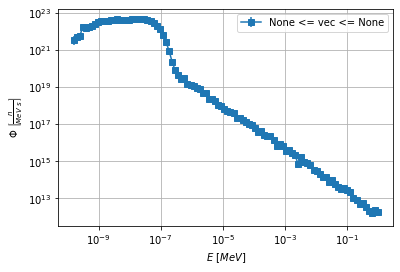

In [7]:
# Graficos en E

vec0 = None # [0, 0,0, -1,-1,-1] # [0, -30,-30, 0,-np.pi]
vec1 = None # [25, 500,54, 1,1,1] # [25, 30,30, 1,np.pi]
EE = np.logspace(-9.8,0,100)
fig,scores = s.plot_E(EE, vec0, vec1)
plt.show(block=True)

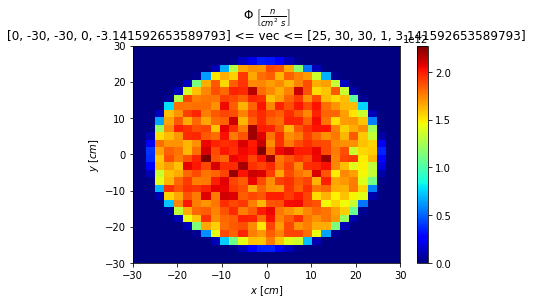

In [8]:
# Graficos en xy

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, 1,np.pi]
xx = np.linspace(-30,30,30)
yy = np.linspace(-30,30,30)
fig,scores = s.plot2D_integr([xx,yy], ["x","y"], vec0, vec1)
plt.show()

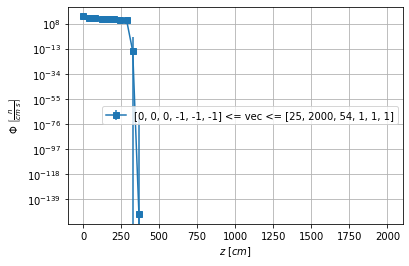

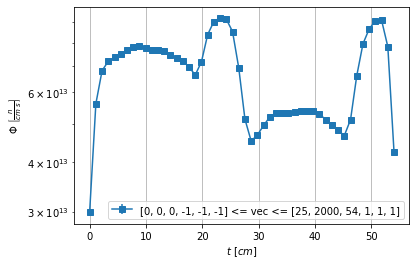

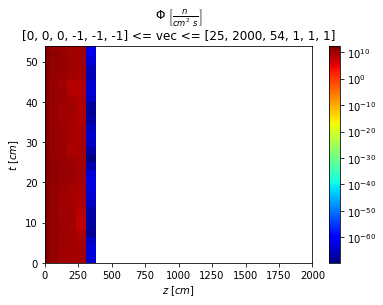

In [9]:
# Graficos en zt (guia)

DZ = 2000

vec0 = [0, 0,0, -1,-1,-1]
vec1 = [25, DZ,54, 1,1,1] 
zz = np.linspace(0,DZ,50)
fig,scores = s.plot_integr(zz, 1, vec0, vec1)
plt.show(block=True)

vec0 = [0, 0,0, -1,-1,-1]
vec1 = [25, DZ,54, 1,1,1] 
tt = np.linspace(0,54,50)
fig,scores = s.plot_integr(tt, 2, vec0, vec1)
plt.show(block=True)

vec0 = [0, 0,0, -1,-1,-1] # [0, -30,-30, 0,-np.pi]
vec1 = [25, DZ,54, 1,1,1] # [25, 30,30, 1,np.pi]
zz = np.linspace(0,DZ,30)
tt = np.linspace(0,54,30)
fig,scores = s.plot2D_integr([zz,tt], ["z","t"], vec0, vec1, scale="log")
plt.show(block=True)

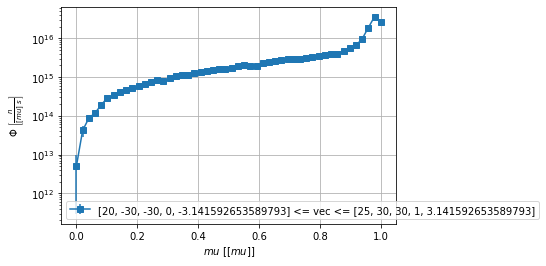

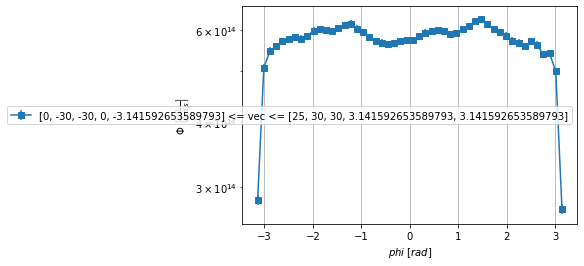

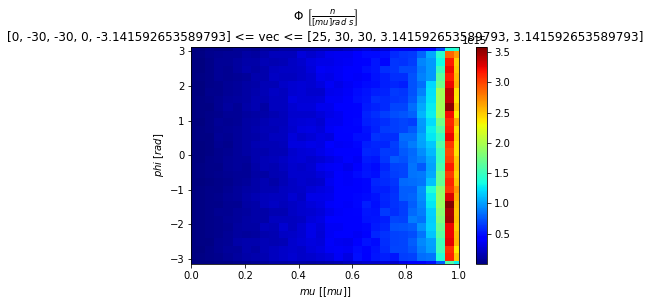

In [11]:
# Graficos polares

vec0 = [20, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, 1,np.pi]
mm = np.linspace(0,1,50)
fig,scores = s.plot_integr(mm, 3, vec0, vec1)
plt.show()

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, np.pi,np.pi]
pp = np.linspace(-np.pi,np.pi,50)
fig,scores = s.plot_integr(pp, 4, vec0, vec1)
plt.show()

vec0 = [0, -30,-30, 0,-np.pi]
vec1 = [25, 30,30, np.pi,np.pi]
mm = np.linspace(0,1,30)
pp = np.linspace(-np.pi,np.pi,30)
fig,[scores,errs] = s.plot2D_integr([mm,pp], ["mu","phi"], vec0, vec1)
plt.show()

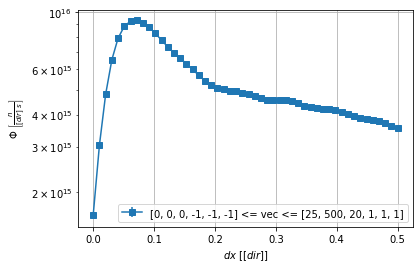

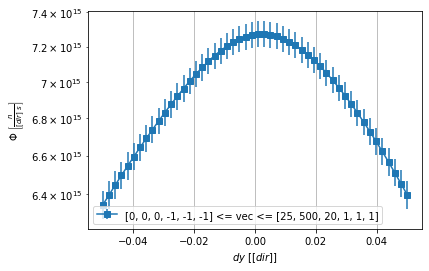

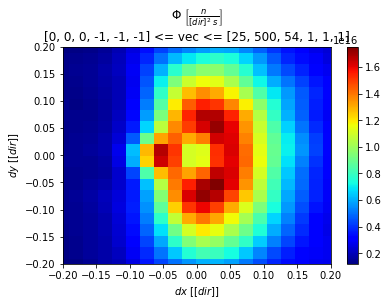

In [10]:
# Graficos isotrop

vec0 = [0, 0,0, -1,-1,-1]
vec1 = [25, 500,20, 1,1,1] 
ddx = np.linspace(0,0.5,50)
fig,scores = s.plot_integr(ddx, "dx", vec0, vec1)
plt.show()

vec0 = [0, 0,0, -1,-1,-1]
vec1 = [25, 500,20, 1,1,1]
ddy = np.linspace(-0.05,0.05,50)
fig,scores = s.plot_integr(ddy, "dy", vec0, vec1)
plt.show()

vec0 = [0, 0,0, -1,-1,-1]
vec1 = [25, 500,54, 1,1,1] 
ddx = np.linspace(-0.2,0.2,20)
ddy = np.linspace(-0.2,0.2,20)
fig,[scores,errs] = s.plot2D_integr([ddx,ddy], ["dx","dy"], vec0, vec1)
plt.show()